# Helmholtz Phasor Method for determining optimal Geothermal heat pump Depth
## Variables

k (Thermal conductivity, W/mK): A measure of a material's ability to conduct heat. Higher values indicate better heat conduction.

rho (Density, kg/m³): The mass per unit volume of the ground material. It affects the amount of heat the ground can store.

c_p (Specific heat capacity, J/kgK): The amount of heat required to raise the temperature of one kilogram of a material by one degree Celsius. It also influences the ground's heat storage capacity.

alpha (Thermal diffusivity, m²/s): A measure of how quickly heat spreads through a material. It is calculated as the ratio of thermal conductivity to the product of density and specific heat capacity.

period (Seasonal period, days): The length of the season (e.g., summer or winter) in days. It determines the time scale of the temperature fluctuations in the ground.

amplitude (Amplitude of seasonal temperature fluctuations, °C): The difference between the highest and lowest temperatures during a seasonal cycle. It influences the depth at which the temperature fluctuations reach the threshold.

temperature_threshold (Temperature fluctuation threshold, °C): The maximum allowed temperature fluctuation at the depth of the geothermal heat pump system. It is used to determine the depth at which the system should be buried.

heat_pump_efficiency (Heat pump efficiency, 0-1): The ratio of the heat output of the heat pump to the electrical energy input. A value of 1 represents 100% efficiency.

building_insulation (Building insulation factor, 0-1): A measure of the building's insulation effectiveness. A value of 1 represents the best insulation, while lower values indicate poorer insulation.

cost_factor (Cost factor, greater than 0): A factor that represents the cost constraints of the geothermal heat pump installation. Smaller values indicate higher cost constraints.

omega (Angular frequency, rad/s): A measure of how rapidly the temperature fluctuates with time. It is calculated as the ratio of 2 * pi to the product of the seasonal period and 86400 (the number of seconds in a day).

kappa (Complex wave number, m⁻¹): A complex number representing the spatial distribution of temperature fluctuations in the ground. It is calculated as the square root of the product of 1j (the imaginary unit) and the ratio of the angular frequency to the thermal diffusivity.

z (Depth, m): The depth at which the temperature fluctuations reach the threshold, calculated using the real part of the complex wave number.

adjusted_depth (Adjusted depth, m): The depth adjusted based on heat pump efficiency and building insulation.

optimal_depth (Optimal depth, m): The final depth for the geothermal heat pump system, considering heat pump efficiency, building insulation, and cost constraints. It is calculated as the minimum of the adjusted depth and the product of the cost factor and the depth.


## Explanation 
This code is a Python program that calculates the optimal depth at which a geothermal heat pump system should be buried, considering seasonal temperature fluctuations, heat pump efficiency, building insulation, and cost constraints. The program uses the Helmholtz phasor method to model the temperature fluctuations in the ground. The code is organized into several functions:

thermal_diffusivity(k, rho, c_p): This function calculates the thermal diffusivity (α) of the ground using the provided thermal conductivity (k), density (ρ), and specific heat capacity (c_p).

temperature_fluctuation_depth(alpha, period, amplitude, temperature_threshold): This function calculates the depth at which the temperature fluctuations due to seasonal changes reach a certain threshold. It uses the provided thermal diffusivity (α), seasonal period, amplitude of the temperature fluctuations, and temperature threshold.

optimal_depth(alpha, period, amplitude, temperature_threshold, heat_pump_efficiency, building_insulation, cost_factor): This function calculates the optimal depth for the geothermal heat pump system, considering heat pump efficiency, building insulation, and cost constraints. It calls the temperature_fluctuation_depth function and adjusts the calculated depth based on the provided parameters.

get_user_input(): This function prompts the user to input the required parameters for the calculations, including ground properties, seasonal period, amplitude of temperature fluctuations, temperature fluctuation threshold, heat pump efficiency, building insulation factor, and cost factor.

main(): This function serves as the entry point of the program. It calls the get_user_input function to obtain the required parameters from the user, calculates the thermal diffusivity, and then calls the optimal_depth function to determine the optimal depth for the geothermal heat pump system. Finally, it prints the optimal depth in meters.

When you run this program, it prompts you to input the required parameters, performs the calculations, and outputs the optimal depth for the geothermal heat pump system considering heat pump efficiency, building insulation, and cost constraints.

In [6]:
import math
import cmath

def thermal_diffusivity(k, rho, c_p):
    return k / (rho * c_p)

def temperature_fluctuation_depth(alpha, period, amplitude, temperature_threshold):
    omega = 2 * math.pi / (period * 86400)  # Angular frequency (rad/s)
    kappa = cmath.sqrt(1j * omega / alpha)  # Complex wave number (m⁻¹)
    z = math.log(temperature_threshold / amplitude) / kappa.real
    return abs(z)

def optimal_depth(alpha, period, amplitude, temperature_threshold, heat_pump_efficiency, building_insulation, cost_factor):
    depth = temperature_fluctuation_depth(alpha, period, amplitude, temperature_threshold)
    
    # Adjust depth based on heat pump efficiency and building insulation
    adjusted_depth = depth / (heat_pump_efficiency * building_insulation)

    # Optimize depth based on cost constraints
    optimal_depth = min(adjusted_depth, cost_factor * depth)

    return optimal_depth

def get_user_input():
    print("Please provide the following ground properties:")
    k = float(input("Thermal conductivity (W/mK): "))
    rho = float(input("Density (kg/m³): "))
    c_p = float(input("Specific heat capacity (J/kgK): "))

    print("\nPlease provide the seasonal period (days):")
    period = float(input("Seasonal period: "))

    print("\nPlease provide the amplitude of seasonal temperature fluctuations (°C):")
    amplitude = float(input("Amplitude: "))

    print("\nPlease provide the temperature fluctuation threshold (°C):")
    temperature_threshold = float(input("Temperature fluctuation threshold: "))
    
    print("\nPlease provide the heat pump efficiency (0-1, where 1 is 100% efficient):")
    heat_pump_efficiency = float(input("Heat pump efficiency: "))

    print("\nPlease provide the building insulation factor (0-1, where 1 represents the best insulation):")
    building_insulation = float(input("Building insulation factor: "))
    
    print("\nPlease provide the cost factor (greater than 0, where smaller values represent higher cost constraints):")
    cost_factor = float(input("Cost factor: "))

    return k, rho, c_p, period, amplitude, temperature_threshold, heat_pump_efficiency, building_insulation, cost_factor

def main():
    k, rho, c_p, period, amplitude, temperature_threshold, heat_pump_efficiency, building_insulation, cost_factor = get_user_input()

    alpha = thermal_diffusivity(k, rho, c_p)
    depth = optimal_depth(alpha, period, amplitude, temperature_threshold, heat_pump_efficiency, building_insulation, cost_factor)

    print(f"\nOptimal depth considering heat pump efficiency, building insulation, and cost constraints: {depth:.2f} meters")

if __name__ == "__main__":
    main()



Please provide the following ground properties:
Thermal conductivity (W/mK): 1.4
Density (kg/m³): 1250
Specific heat capacity (J/kgK): 850

Please provide the seasonal period (days):
Seasonal period: 182.5

Please provide the amplitude of seasonal temperature fluctuations (°C):
Amplitude: 34

Please provide the temperature fluctuation threshold (°C):
Temperature fluctuation threshold: 2

Please provide the heat pump efficiency (0-1, where 1 is 100% efficient):
Heat pump efficiency: .6

Please provide the building insulation factor (0-1, where 1 represents the best insulation):
Building insulation factor: .6

Please provide the cost factor (greater than 0, where smaller values represent higher cost constraints):
Cost factor: 1

Optimal depth considering heat pump efficiency, building insulation, and cost constraints: 7.29 meters


# Example numbers 
Please provide the following ground properties:

Thermal conductivity (W/mK): 1.4

Density (kg/m³): 1250

Specific heat capacity (J/kgK): 850

Please provide the seasonal period (days):

Seasonal period: 182.5

Please provide the amplitude of seasonal temperature fluctuations (°C):

Amplitude: 34

Please provide the temperature fluctuation threshold (°C):

Temperature fluctuation threshold: 2

Please provide the heat pump efficiency (0-1, where 1 is 100% efficient):

Heat pump efficiency: .6

Please provide the building insulation factor (0-1, where 1 represents the best insulation):

Building insulation factor: .6

Please provide the cost factor (greater than 0, where smaller values represent higher cost constraints):

Cost factor: 1

Optimal depth considering heat pump efficiency, building insulation, and cost constraints: 7.29 meters

# Geothermal heat pump Cost benefit analysis
## Variables
geothermal_install_cost: The total cost to install the geothermal heat pump system, including equipment, drilling or excavation, labor, and permits and fees.

furnace_install_cost: The total cost to install the furnace system, including equipment, installation, labor, and permits and fees.

geothermal_energy_cost: The annual energy cost associated with operating the geothermal heat pump system, based on electricity consumption and local electricity rates.

furnace_energy_cost: The annual energy cost associated with operating the furnace system, based on fuel consumption (e.g., natural gas) and local fuel rates.

geothermal_maintenance_cost: The annual cost of maintaining the geothermal heat pump system, including scheduled and unscheduled maintenance.

furnace_maintenance_cost: The annual cost of maintaining the furnace system, including scheduled and unscheduled maintenance.

geothermal_lifespan: The expected lifespan of the geothermal heat pump system, in years.

furnace_lifespan: The expected lifespan of the furnace system, in years.

incentives_rebates: The total monetary value of incentives and rebates available for the geothermal heat pump system, including federal, state, local, and utility company incentives and rebates.

years: The maximum of the geothermal heat pump and furnace lifespans, used to set the time frame for the cost-benefit analysis.

geothermal_annual_costs: A NumPy array containing the annual operating costs (energy cost + maintenance cost) for the geothermal heat pump system over the considered time frame.

furnace_annual_costs: A NumPy array containing the annual operating costs (energy cost + maintenance cost) for the furnace system over the considered time frame.

geothermal_cumulative_costs: A NumPy array containing the cumulative costs (installation cost + operating costs) for the geothermal heat pump system over the considered time frame.

furnace_cumulative_costs: A NumPy array containing the cumulative costs (installation cost + operating costs) for the furnace system over the considered time frame.

break_even_year: The first year when the cumulative cost of the geothermal heat pump system is lower than the cumulative cost of the furnace system, indicating that the geothermal heat pump has become more cost-effective. If no such year exists within the considered time frame, the variable remains empty.

## Explanation 

Import the necessary libraries: NumPy for numerical computations and Matplotlib's Pyplot for plotting.

Prompt the user for input on the following variables: geothermal installation cost, furnace installation cost, annual energy costs for both systems, annual maintenance costs for both systems, lifespans of both systems, and total incentives and rebates for the geothermal heat pump.

Adjust the geothermal installation cost by subtracting the incentives and rebates.
Calculate the annual costs for both systems over the maximum lifespan of either system by creating NumPy arrays filled with the sum of annual energy and maintenance costs.

Calculate the cumulative costs for both systems over the maximum lifespan by using NumPy's cumulative sum function and adding the installation costs.

Plot the cumulative costs of the geothermal heat pump and furnace systems over the maximum lifespan using Matplotlib's Pyplot. Label the axes, add a title, and display the legend and the plot.

Find the break-even year when the geothermal heat pump becomes more cost-effective than the furnace by using NumPy's where function to find the first index where the geothermal cumulative cost is less than the furnace cumulative cost.

Print the result, indicating when the geothermal heat pump becomes more cost-effective than the furnace. If no break-even year is found within the considered time frame, print a message stating that the geothermal heat pump does not become more cost-effective.

The code collects user inputs for various costs, energy use, maintenance costs, and lifespans of both geothermal heat pump and furnace systems. It then calculates and plots the cumulative costs for each system over time. Finally, it calculates and outputs the break-even year when the geothermal heat pump becomes more cost-effective than the furnace.


## average test numbers 
Geothermal installation cost ($): 30000

Furnace installation cost ($): 0

Annual energy cost for geothermal heat pump ($): 1557

Annual energy cost for furnace ($): 3550

Annual maintenance cost for geothermal heat pump ($): 550

Annual maintenance cost for furnace ($): 200

Lifespan of geothermal heat pump (years): 25

Lifespan of furnace (years): 20

Total incentives and rebates for geothermal heat pump ($): 9000


Geothermal installation cost ($): 30000
Furnace installation cost ($): 0
Annual energy cost for geothermal heat pump ($): 1557
Annual energy cost for furnace ($): 3550
Annual maintenance cost for geothermal heat pump ($): 550
Annual maintenance cost for furnace ($): 200
Lifespan of geothermal heat pump (years): 25
Lifespan of furnace (years): 20
Total incentives and rebates for geothermal heat pump ($): 9000


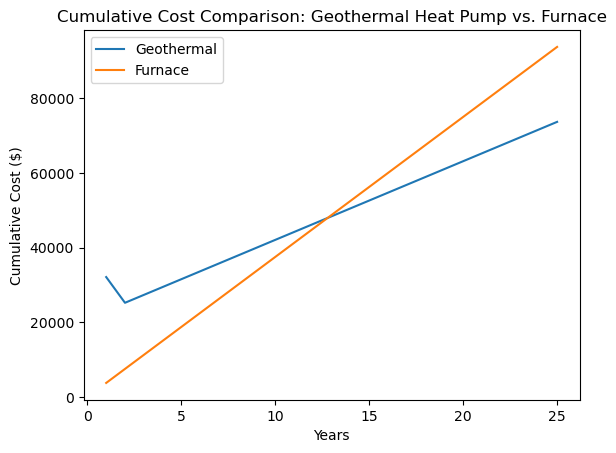

Geothermal heat pump becomes more cost-effective than the furnace in year 13.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Prompt user for input
geothermal_install_cost = float(input("Geothermal installation cost ($): "))
furnace_install_cost = float(input("Furnace installation cost ($): "))
geothermal_energy_cost = float(input("Annual energy cost for geothermal heat pump ($): "))
furnace_energy_cost = float(input("Annual energy cost for furnace ($): "))
geothermal_maintenance_cost = float(input("Annual maintenance cost for geothermal heat pump ($): "))
furnace_maintenance_cost = float(input("Annual maintenance cost for furnace ($): "))
geothermal_lifespan = int(input("Lifespan of geothermal heat pump (years): "))
furnace_lifespan = int(input("Lifespan of furnace (years): "))
incentives_rebates = float(input("Total incentives and rebates for geothermal heat pump ($): "))

# Calculate annual costs
years = max(geothermal_lifespan, furnace_lifespan)
geothermal_annual_costs = np.full(years, geothermal_energy_cost + geothermal_maintenance_cost)
furnace_annual_costs = np.full(years, furnace_energy_cost + furnace_maintenance_cost)

# Calculate cumulative costs
geothermal_cumulative_costs = np.cumsum(geothermal_annual_costs) + geothermal_install_cost
furnace_cumulative_costs = np.cumsum(furnace_annual_costs) + furnace_install_cost

# Apply incentives and rebates after one year
geothermal_cumulative_costs[1:] -= incentives_rebates

# Plot cumulative costs
plt.plot(range(1, years + 1), geothermal_cumulative_costs, label="Geothermal")
plt.plot(range(1, years + 1), furnace_cumulative_costs, label="Furnace")
plt.xlabel("Years")
plt.ylabel("Cumulative Cost ($)")
plt.title("Cumulative Cost Comparison: Geothermal Heat Pump vs. Furnace")
plt.legend()
plt.show()

# Print results
break_even_year = np.where(geothermal_cumulative_costs < furnace_cumulative_costs)[0]
if break_even_year.size > 0:
    print(f"Geothermal heat pump becomes more cost-effective than the furnace in year {break_even_year[0] + 1}.")
else:
    print("The geothermal heat pump does not become more cost-effective than the furnace within the considered time frame.")
